In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier

# Load data
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# Encode target variable: Adult=0, Senior=1
label_encoder = LabelEncoder()
train_df['age_group'] = label_encoder.fit_transform(train_df['age_group'])

# Drop SEQN (identifier) from features
X_train = train_df.drop(columns=['SEQN', 'age_group'])
y_train = train_df['age_group']
X_test = test_df.drop(columns=['SEQN'])

# Build pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42))
])

# Optional: Evaluate using cross-validation
f1_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
print("Cross-validated F1 score:", f1_scores.mean())

# Train on full data
pipeline.fit(X_train, y_train)

# Predict on test set
preds = pipeline.predict(X_test)

# Create submission file
submission = pd.DataFrame({'age_group': preds})
submission.to_csv("submission.csv", index=False)
print("Saved as submission.csv")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py", line 1324, in f1_score
    return fbeta_score(
           ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/

Cross-validated F1 score: nan
Saved as submission.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("Train_Data.csv")

# Encode age group
label_encoder = LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])  # Adult = 0, Senior = 1
df['age_group_label'] = label_encoder.inverse_transform(df['age_group'])

# Group by age_group and get min/max
min_max = df.groupby('age_group_label').agg(['min', 'max'])

# Optional: display a cleaner view
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(min_max)


                    SEQN          RIAGENDR      PAQ605      BMXBMI        \
                     min      max      min  max    min  max    min   max   
age_group_label                                                            
Adult            73564.0  83727.0      1.0  2.0    1.0  7.0   14.5  70.1   
Senior           73607.0  83702.0      1.0  2.0    1.0  2.0   16.8  52.2   

                LBXGLU        DIQ010      LBXGLT        LBXIN          \
                   min    max    min  max    min    max   min     max   
age_group_label                                                         
Adult             63.0  405.0    1.0  3.0   40.0  604.0  0.14  102.29   
Senior            80.0  208.0    1.0  3.0   48.0  346.0  1.02   52.89   

                age_group      
                      min max  
age_group_label                
Adult                   0   0  
Senior                  1   1  


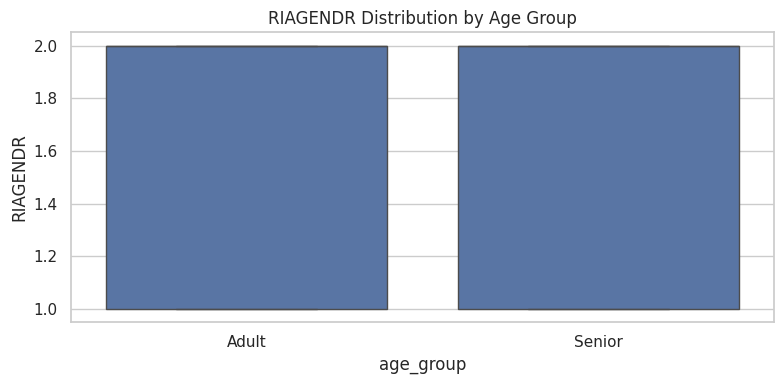

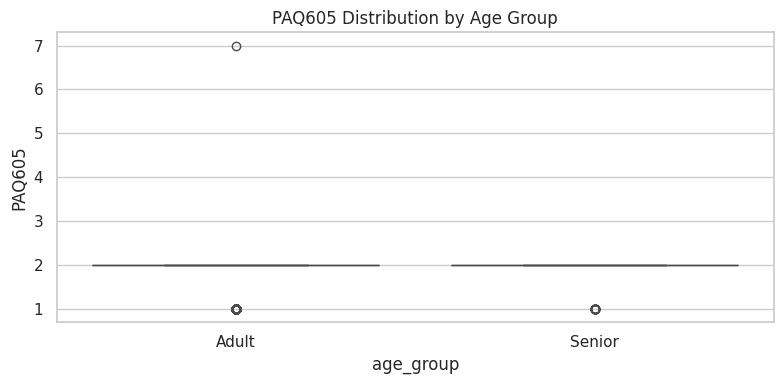

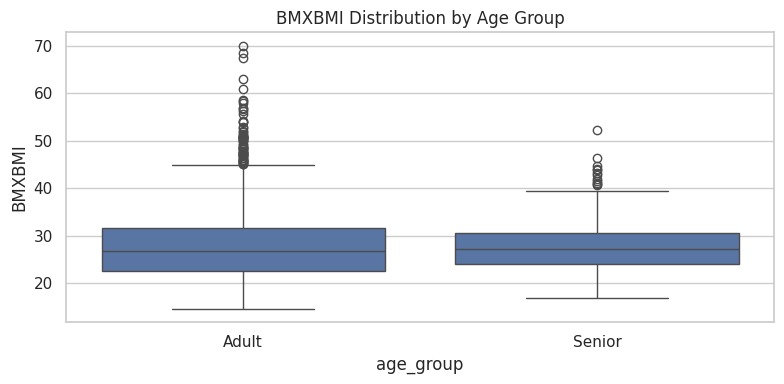

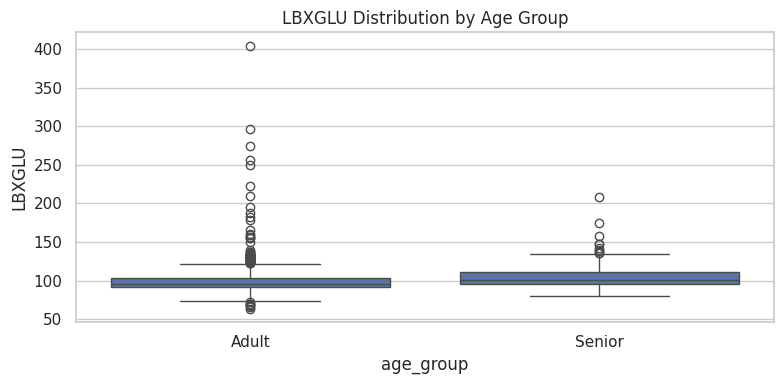

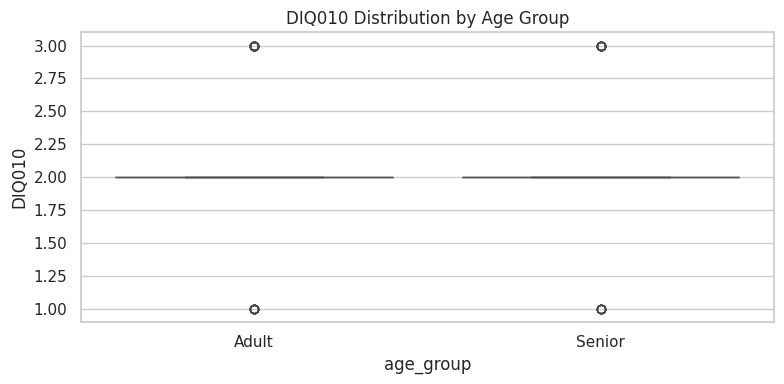

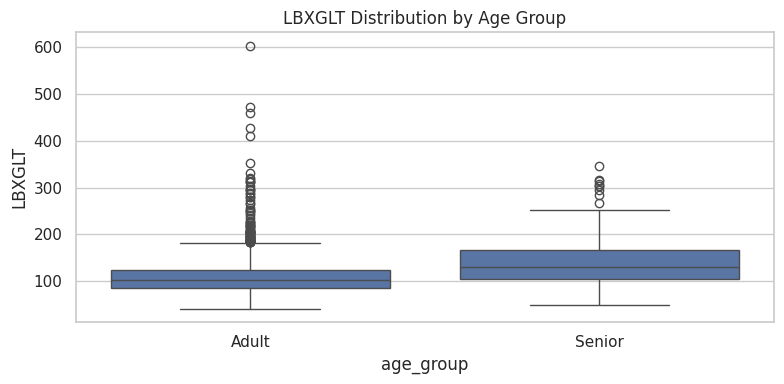

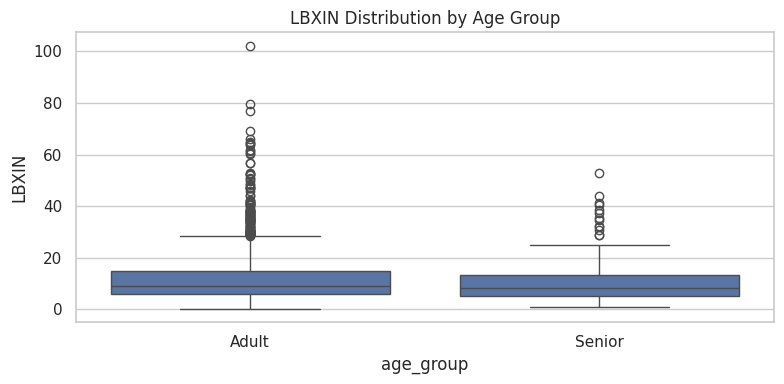

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Train_Data.csv')  # Replace with your actual CSV file

# Set seaborn theme
sns.set(style="whitegrid")

# List of numeric features to visualize
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']

# Plot feature distributions per age group
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='age_group', y=feature, data=df)
    plt.title(f'{feature} Distribution by Age Group')
    plt.tight_layout()
    plt.show()


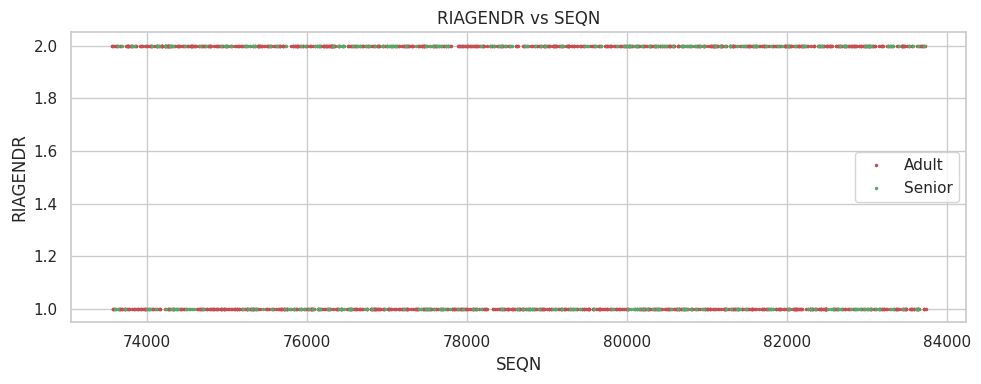

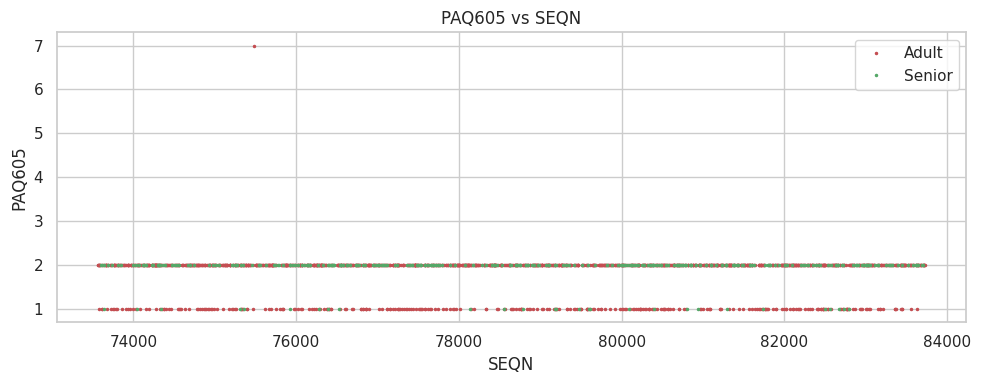

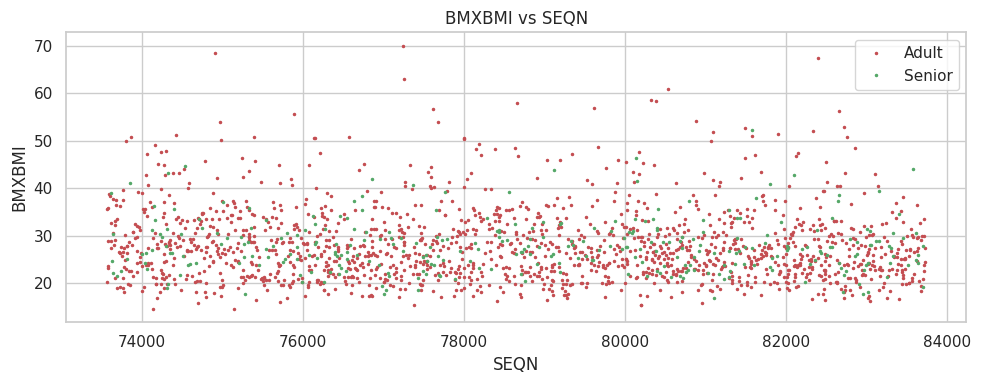

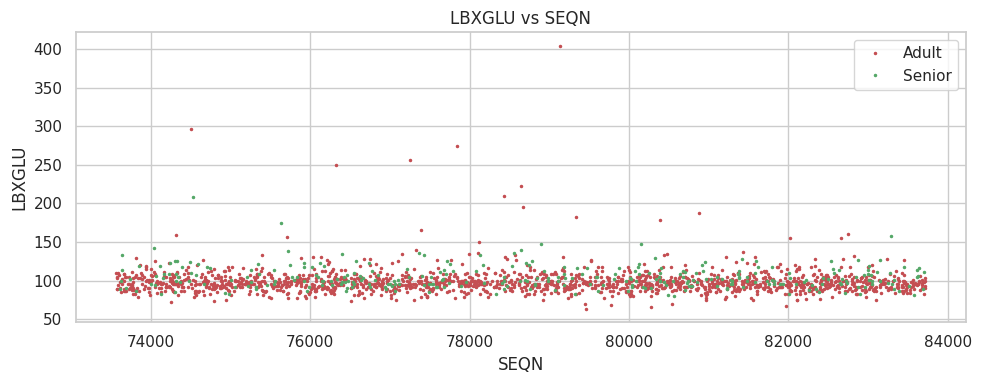

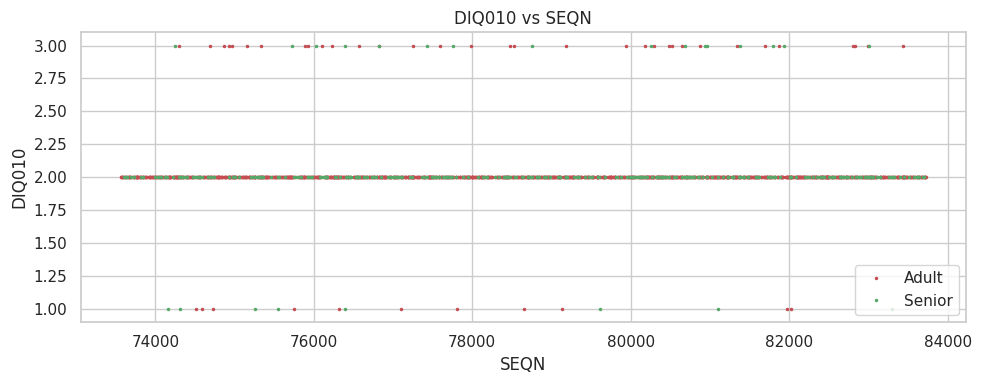

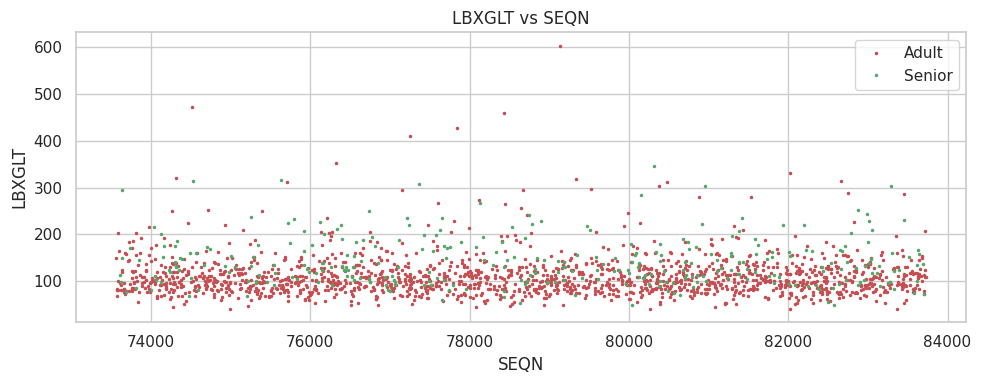

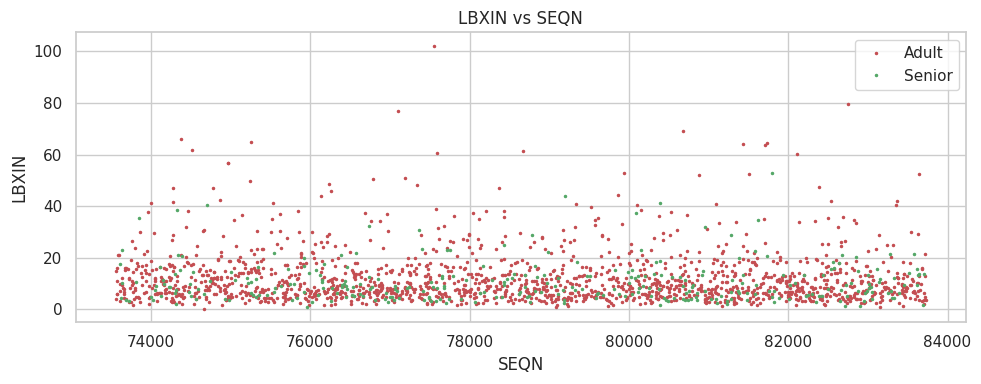

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Train_Data.csv")  # Replace with your CSV file name

# Ensure sorting for better line continuity
df = df.sort_values(by='SEQN')

# List of columns to plot (excluding SEQN and age_group)
columns = [col for col in df.columns if col not in ['SEQN', 'age_group']]

# Plot each feature vs SEQN, colored by age group
for col in columns:
    plt.figure(figsize=(10, 4))

    # Plot Adult values in red
    adult = df[df['age_group'] == 'Adult']
    plt.plot(adult['SEQN'], adult[col], 'r.', label='Adult', markersize=3)

    # Plot Senior values in green
    senior = df[df['age_group'] == 'Senior']
    plt.plot(senior['SEQN'], senior[col], 'g.', label='Senior', markersize=3)

    plt.title(f'{col} vs SEQN')
    plt.xlabel('SEQN')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

train = pd.read_csv("Train_Data.csv")
test = pd.read_csv("Test_Data.csv")

train = train.dropna(subset=['age_group'])

train['age_group'] = train['age_group'].map({'Adult': 0, 'Senior': 1})


features = ['PAQ605', 'LBXGLU', 'LBXGLT', 'LBXIN']

X = train[features]
y = train['age_group']
X_test = test[features]


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X_test = imputer.transform(X_test)


scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(random_state=42)
model.fit(X, y)

test_preds = model.predict(X_test)


submission = pd.DataFrame({'age_group': test_preds.astype(int)})
submission.to_csv("submission.csv", index=False)



✅ Submission file 'submission.csv' created successfully.
